In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leer dataframe
df = pd.read_excel('Agricultura-Sonora-Cereales.xlsx')
df.head()

,ANO,CIERREYAVAN,CICLO,CDDR,NDDR,CMUN,NMUN,CVECUL,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,RENDMNTO,PMR,VALPROD,TIPO DE CLASIFICACIÓN
0,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,Agua Prieta,51,Trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80,Cereales
1,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,139,DDR 139 CABORCA,17,Caborca,51,Trigo grano,15267.0,15252.0,15.0,109935.0,7.21,1396.6,153535.22,Cereales
2,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,33,Maíz grano,39258.0,37475.0,1783.0,211524.0,5.64,1320.0,279211.68,Cereales
3,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,47,Sorgo grano,43.0,0.0,43.0,0.0,0.00,0.0,0.00,Cereales
4,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,51,Trigo grano,116200.0,116200.0,0.0,701141.0,6.03,1360.0,953551.76,Cereales


In [ ]:
df.shape

(2437, 17)

In [ ]:
df.columns

Index(['ANO', 'CIERREYAVAN', 'CICLO', 'CDDR', 'NDDR', 'CMUN', 'NMUN', 'CVECUL',
       'CULTIVO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON', 'RENDMNTO', 'PMR',
       'VALPROD', 'TIPO DE CLASIFICACIÓN'],
      dtype='object')

In [ ]:
# Eliminar columnas que no son de interés
dropped_columns = ['ANO', 'CIERREYAVAN', 'CDDR', 'CMUN', 'CVECUL', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
df = df.drop(dropped_columns, axis=1)
df.head()

,CICLO,NDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
0,1,DDR 141 AGUA PRIETA,Agua Prieta,Trigo grano,29.0,29.0,0.0,86.0
1,1,DDR 139 CABORCA,Caborca,Trigo grano,15267.0,15252.0,15.0,109935.0
2,1,DDR 148 CAJEME,Cajeme,Maíz grano,39258.0,37475.0,1783.0,211524.0
3,1,DDR 148 CAJEME,Cajeme,Sorgo grano,43.0,0.0,43.0,0.0
4,1,DDR 148 CAJEME,Cajeme,Trigo grano,116200.0,116200.0,0.0,701141.0


In [ ]:
# Definir las columnas de interés en una variable para que sea más facil darle formato a los futuros datos de prueba
columnas_interes = df.columns
columnas_interes

Index(['CICLO', 'NDDR', 'NMUN', 'CULTIVO', 'SUPSEM', 'SUPCOSE', 'SUPSINI',
       'PRODTON'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CICLO    2437 non-null   int64  
 1   NDDR     2437 non-null   object 
 2   NMUN     2437 non-null   object 
 3   CULTIVO  2437 non-null   object 
 4   SUPSEM   2437 non-null   float64
 5   SUPCOSE  2437 non-null   float64
 6   SUPSINI  2437 non-null   float64
 7   PRODTON  2437 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 152.4+ KB


In [ ]:
# Revisar si hay valores nulos
df.isna().sum()

CICLO      0
NDDR       0
NMUN       0
CULTIVO    0
SUPSEM     0
SUPCOSE    0
SUPSINI    0
PRODTON    0
dtype: int64

In [ ]:
#   Function to eliminate upper and lower outliers
def eliminate_outliers(df, column_name):
    print('Currently in column:{}'.format(column))
    if df[column].dtype != 'object':

        #   Remove outliers using Z score. Usuar guideline is to remove anything that has Z score > 3 or Z score < -3
        df = df[df[column]<=(df[column].mean()+3*df[column].std())]
        print(df.shape)
        return df
    else:
        print('Column skipped, dtype=object')
        return df

#   Apply function in for loop
for column in df.columns:
    df = eliminate_outliers(df, column)


Currently in column:CICLO
(2437, 8)
Currently in column:NDDR
Column skipped, dtype=object
Currently in column:NMUN
Column skipped, dtype=object
Currently in column:CULTIVO
Column skipped, dtype=object
Currently in column:SUPSEM
(2399, 8)
Currently in column:SUPCOSE
(2299, 8)
Currently in column:SUPSINI
(2276, 8)
Currently in column:PRODTON
(2199, 8)


In [ ]:
df.shape

(2437, 8)

In [ ]:
# Ver qué columnas son categóricas
for columna in df.columns:
  print('Columna: {}\nCantidad de respuestas en la columna: {}\n'.format(columna, df[columna].nunique()))

Columna: CICLO
Cantidad de respuestas en la columna: 2

Columna: NDDR
Cantidad de respuestas en la columna: 12

Columna: NMUN
Cantidad de respuestas en la columna: 64

Columna: CULTIVO
Cantidad de respuestas en la columna: 9

Columna: SUPSEM
Cantidad de respuestas en la columna: 1114

Columna: SUPCOSE
Cantidad de respuestas en la columna: 1098

Columna: SUPSINI
Cantidad de respuestas en la columna: 162

Columna: PRODTON
Cantidad de respuestas en la columna: 1811



In [ ]:
# Definir las columnas categóricas en una variable
columnas_categoricas=['CICLO', 'NDDR', 'NMUN', 'CULTIVO']

In [ ]:
# Ciclo para revisar las posibles respuestas de cada columna categórica
for columna in columnas_categoricas:
  print('Columna: {}\nCantidad de respuestas en la columna: {}\n'.format(columna, df[columna].unique()))

Columna: CICLO
Cantidad de respuestas en la columna: [1 2]

Columna: NDDR
Cantidad de respuestas en la columna: ['DDR 141 AGUA PRIETA' 'DDR 139 CABORCA' 'DDR 148 CAJEME'
 'DDR 147 GUAYMAS' 'DDR 144 HERMOSILLO' 'DDR 140 MAGDALENA'
 'DDR 145 MAZATAN' 'DDR 143 MOCTEZUMA' 'DDR 149 NAVOJOA' 'DDR 142 URES'
 'DDR 146 SAHUARIPA' 'DDR 193 SAN LUIS RIO COLORADO']

Columna: NMUN
Cantidad de respuestas en la columna: ['Agua Prieta' 'Caborca' 'Cajeme' 'Guaymas' 'Hermosillo' 'Magdalena'
 'Mazatán' 'Moctezuma' 'Navojoa' 'Ures' 'Sahuaripa' 'Altar' 'Átil'
 'Plutarco Elías Calles' 'Oquitoa' 'Pitiquito' 'Sáric' 'Tubutama' 'Bácum'
 'Benito Juárez' 'Etchojoa' 'San Ignacio Río Muerto' 'Empalme' 'Carbó'
 'San Miguel de Horcasitas' 'Trincheras' 'Bacerac' 'Bavispe' 'Cumpas'
 'Divisaderos' 'Huachinera' 'Tepache' 'Huatabampo' 'San Luis Río Colorado'
 'Aconchi' 'Arizpe' 'Banámichi' 'Baviácora' 'Opodepe' 'Rayón' 'Quiriego'
 'Rosario' 'Cucurpe' 'Ímuris' 'Nogales' 'Santa Ana' 'Bacadéhuachi'
 'Granados' 'Huásabas' 'N

In [ ]:
# Obtener dummies de las variables categoricas
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head(25)

,CICLO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NDDR_DDR 140 MAGDALENA,NDDR_DDR 141 AGUA PRIETA,NDDR_DDR 142 URES,NDDR_DDR 143 MOCTEZUMA,NDDR_DDR 144 HERMOSILLO,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
0,1,29.0,29.0,0.0,86.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15267.0,15252.0,15.0,109935.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,39258.0,37475.0,1783.0,211524.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,43.0,0.0,43.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,116200.0,116200.0,0.0,701141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,299.0,291.0,8.0,1310.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,146.0,0.0,146.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,2971.0,2971.0,0.0,16369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,1180.0,1180.0,0.0,4130.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,1,19640.0,19640.0,0.0,125696.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['CICLO'].unique()

array([1, 2])

In [ ]:
# Convertir los valores con valor '2' a '0' para hacerla binaria
mapping = {2: 0}
df['CICLO'] = df['CICLO'].replace(mapping)
df['CICLO'].unique()

array([1, 0])

<Axes: >

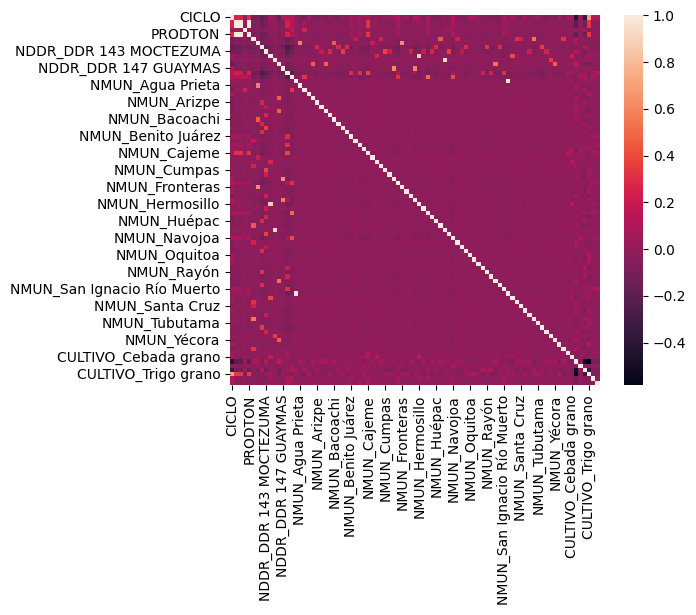

In [ ]:
# Matriz de correlacion
cormat = df.corr()

# Grafica de correlacion
sns.heatmap(cormat, vmax=1, square=True)

In [ ]:
cormat

,CICLO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NDDR_DDR 140 MAGDALENA,NDDR_DDR 141 AGUA PRIETA,NDDR_DDR 142 URES,NDDR_DDR 143 MOCTEZUMA,NDDR_DDR 144 HERMOSILLO,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
CICLO,1.000000,0.262885,0.262333,0.021943,0.285695,-0.113029,-0.079495,-0.185162,-0.126478,0.071593,...,0.071614,-0.072693,0.038007,0.095965,-0.418894,-0.012665,-0.342102,0.691385,0.134419,0.107968
SUPSEM,0.262885,1.000000,0.999265,0.047825,0.984921,-0.066677,-0.045032,-0.136412,-0.097508,-0.005227,...,-0.027535,-0.023078,-0.010214,-0.023958,-0.202092,-0.013975,-0.107596,0.340209,-0.024867,-0.028541
SUPCOSE,0.262333,0.999265,1.000000,0.009501,0.986042,-0.065769,-0.044346,-0.134476,-0.097116,-0.004428,...,-0.027108,-0.022741,-0.010063,-0.023569,-0.203398,-0.013758,-0.109171,0.342732,-0.024313,-0.028144
SUPSINI,0.021943,0.047825,0.009501,1.000000,-0.000975,-0.025585,-0.019168,-0.054354,-0.013015,-0.021013,...,-0.011908,-0.009455,-0.004224,-0.010814,0.028249,-0.006061,0.037958,-0.055973,-0.015147,-0.011169
PRODTON,0.285695,0.984921,0.986042,-0.000975,1.000000,-0.065097,-0.044107,-0.134300,-0.096520,-0.003762,...,-0.026833,-0.022406,-0.009918,-0.023826,-0.186550,-0.012911,-0.134936,0.347541,-0.023913,-0.027763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CULTIVO_Sorgo escobero,-0.012665,-0.013975,-0.013758,-0.006061,-0.012911,-0.011793,-0.007960,-0.023900,-0.016946,-0.010542,...,-0.004849,-0.003910,-0.001744,-0.004404,-0.045212,1.000000,-0.026412,-0.031728,-0.006168,-0.004955
CULTIVO_Sorgo grano,-0.342102,-0.107596,-0.109171,0.037958,-0.134936,-0.029278,-0.078846,0.154783,-0.116542,-0.010420,...,-0.051893,-0.041838,-0.018664,-0.047126,-0.483816,-0.026412,1.000000,-0.339519,-0.066009,-0.053020
CULTIVO_Trigo grano,0.691385,0.340209,0.342732,-0.055973,0.347541,-0.034864,-0.027052,-0.022421,-0.010610,0.038230,...,0.115419,-0.050259,-0.022421,-0.056611,-0.581197,-0.031728,-0.339519,1.000000,-0.079296,-0.063691
CULTIVO_Trigo grano semilla,0.134419,-0.024867,-0.024313,-0.015147,-0.023913,-0.029474,-0.019895,-0.059732,-0.042353,0.039761,...,-0.012120,-0.009771,-0.004359,-0.011006,-0.112996,-0.006168,-0.066009,-0.079296,1.000000,-0.012383


### Implementación del modelo polinomial

In [ ]:
# Definir nuestro df polinomial
df_poly = df

In [ ]:
# df_poly = df_poly.drop('SUPSEM', axis=1)

In [ ]:
# División del dataset, la variable independiente es la PRODTON
X = df_poly.drop('PRODTON', axis=1)
X.shape

(2437, 86)

In [ ]:
y = df_poly['PRODTON']
y.shape

(2437,)

In [ ]:
# Division de entrenamiento y prueba, 70 y 30% respectivamente
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=30)

In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Definición de la regresión polinomial, en este caso es de grado 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)

In [ ]:
# Implementación de la regresión polinomial a una regresión lineal
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Definción del conjunto de prueba para el modelo polinomial
X_poly_test = poly_reg.transform(X_test)

In [ ]:
# Revisar el score de ambos conjuntos
print('Poly Score in test = {} \n \n Poly Score in train = {}'.format(lin_reg_2.score(X_poly_test, y_test), lin_reg_2.score(X_poly, y_train)))

Poly Score in test = -1.1070491934769704e+16 
 
 Poly Score in train = 0.994406010786629


### Está sobreajustado

In [ ]:
#   Lasso Regularization = L1,
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_poly, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L1 Score in test = {} \n \n L1 Score in train = {}'.format(lasso_reg.score(X_poly_test, y_test), lasso_reg.score(X_poly, y_train)))

L1 Score in test = 0.9796365396980798 
 
 L1 Score in train = 0.9897046984237929


In [ ]:
#   Ridge Regularization = L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_poly, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L2 Score in test = {} \n \n L2 Score in train = {}'.format(ridge_reg.score(X_poly_test, y_test), ridge_reg.score(X_poly, y_train)))

L2 Score in test = 0.9139968367586422 
 
 L2 Score in train = 0.9934696428344654


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net con validación cruzada para encontrar el mejor l1_ratio
# elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42)
elastic_net_cv = ElasticNetCV(l1_ratio=[.99], cv=5, random_state=42)
elastic_net_cv.fit(X_poly, y_train)

# Obtener el mejor l1_ratio y el coeficiente alfa
best_l1_ratio = elastic_net_cv.l1_ratio_
best_alpha = elastic_net_cv.alpha_

print(f"Mejor l1_ratio: {best_l1_ratio}")
print(f"Mejor alpha: {best_alpha}")

# Predecir y calcular el MSE en el conjunto de prueba
y_pred = elastic_net_cv.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")

In [ ]:
# Regularización ElasticNet
from sklearn.linear_model import ElasticNet

# Definir el modelo ElasticNet con parámetros alpha y l1_ratio
# alpha controla la cantidad de regularización
# l1_ratio controla la mezcla entre L1 y L2 (0 = solo L2, 1 = solo L1, valores entre 0 y 1 = combinación de L1 y L2)
elastic_net_reg = ElasticNet(alpha=50, l1_ratio=0.75, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)

[  0.          58.39461993 150.0551939  ...  -0.          -0.
   1.16545457]


In [ ]:
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))

Elastic Net Score in test = 0.9462279072093891 
 
 Elastic Net Score in train = 0.9746345962082942


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = lin_reg_2.predict(X_poly)
y_test_pred = lin_reg_2.predict(X_poly_test)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test,
    'y_test_pred': y_test_pred
})

# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("\nComparación del conjunto de prueba:")
print(test_comparison.head())

# Calcular el mse para ambos conjuntos
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

# Calcular r2 para ambos conjuntos
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nR2 en el conjunto de entrenamiento:", train_r2)
print("R2 en el conjunto de prueba:", test_r2)

Comparación del conjunto de entrenamiento:
      y_train_real  y_train_pred
1944           0.0  1.564331e-10
1466          25.0  2.500000e+01
1903       14076.0  1.407600e+04
1215          85.0  8.500000e+01
904           10.4  1.040000e+01

Comparación del conjunto de prueba:
      y_test_real  y_test_pred
1923       217.35   217.350000
976          9.00     8.999988
2132      1739.16  1739.160000
1712      2088.00  2088.000000
1100       149.70   149.700000

Error cuadrático medio en el conjunto de entrenamiento: 5.039971327842969e-17
Error cuadrático medio en el conjunto de prueba: 2745835.9769528094

R2 en el conjunto de entrenamiento: 1.0
R2 en el conjunto de prueba: 0.9987201595288571


In [ ]:
# Crear columna de residuos para ver la diferencia entre los valores reales y las predicciones
test_comparison['Resid'] = abs(test_comparison['y_test_real']-test_comparison['y_test_pred'])
test_comparison.head(100)

,y_test_real,y_test_pred,Resid
1923,217.35,217.350000,5.624372e-10
976,9.00,8.999988,1.216092e-05
2132,1739.16,1739.160000,4.440608e-10
1712,2088.00,2088.000000,1.005174e-08
1100,149.70,149.700000,1.501746e-09
...,...,...,...
2102,22.80,22.800000,1.971056e-09
1159,181.50,181.500000,5.529728e-09
309,2153.00,2153.000000,2.943852e-08
2056,865.80,857.760971,8.039029e+00
